In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Read the data from the file "Advertising.csv"
filename = 'advertising.csv'
df_adv = pd.read_csv(filename)

In [8]:
# Take a quick look of the dataset
df_adv.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [12]:
# kNN by hand for k = 1

# Get a subset of the data i.e. rows 5 to 13
# Use the TV column as the predictor
x_true = df_adv.TV.iloc[5:13]

# Use the Sales column as the response
y_true = df_adv.sales.iloc[5:13]

# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(x_true).values 

# Get the predictor data in the order given by idx above
x_true  = x_true.iloc[idx].values

# Get the response data in the order given by idx above
y_true  = y_true.iloc[idx].values

In [14]:
# Define a function that finds the index of the nearest neighbor and returns the value of the nearest neighbor.  
# Note that this is just for k = 1 where the distance function is simply the absolute value.

def find_nearest(array,value):
    
    # Hint: To find idx, use .idxmin() function on the series
    idx = pd.Series(np.abs(array-value)).idxmin()

    # Return the nearest neighbor index and value
    return idx, array[idx]

In [16]:
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))

In [18]:
# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):

    # Get the Sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi )[0]]

Text(0, 0.5, 'Sales in $1000')

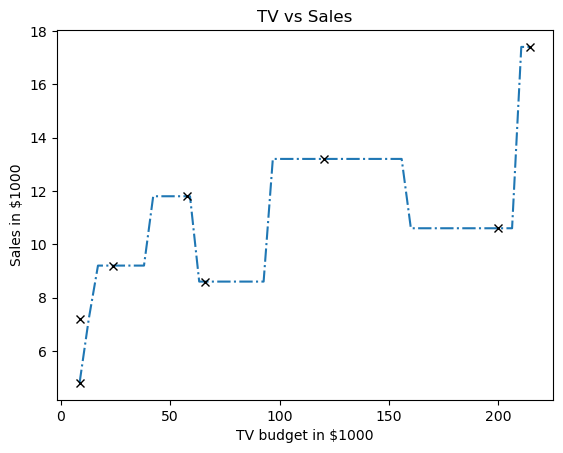

In [20]:
# PLOTTING THE DATA

# Plot the synthetic data along with the predictions    
plt.plot(x, y, '-.')

# Plot the original data using black x's.
plt.plot(x_true, y_true, 'kx')

# Set the title and axis labels
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')